<a href="https://colab.research.google.com/github/VincVX/Uni-NN/blob/main/a3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2 Tutorial: Continued Apartment Price Prediction


## Read in the Data

The first two cells below, you can simply run - they provide a starting point.

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
data = [
    {"size": 19, "price": 380, "rooms": 1, "distance_to_center": 6, "location": "Stieghorst"},
    {"size": 32, "price": 450, "rooms": 1, "distance_to_center": 4, "location": "Schildesche"},
    {"size": 69, "price": 750, "rooms": 3, "distance_to_center": 3, "location": "Heepen"},
    {"size": 60, "price": 800, "rooms": 2, "distance_to_center": 4.5, "location": "Dornberg"},
    {"size": 20, "price": 420, "rooms": 1, "distance_to_center": 1, "location": "Mitte"},
    {"size": 18, "price": 580, "rooms": 1, "distance_to_center": 2, "location": "Gadderbaum"},
    {"size": 52, "price": 700, "rooms": 3, "distance_to_center": 0.5, "location": "Innenstadt"},
    {"size": 45, "price": 1500, "rooms": 2, "distance_to_center": 1.5, "location": "Jöllenbeck"},
    {"size": 50, "price": 1600, "rooms": 2, "distance_to_center": 1, "location": "Sennestadt"}
]

# Step 1: Extract the features (size and distance_to_center) and target (price) from the dictionaries
sizes = np.array([apt['size'] for apt in data])  # Feature 1: size of the apartment
distances = np.array([apt['distance_to_center'] for apt in data])  # Feature 2: distance to city center
prices = np.array([apt['price'] for apt in data])  # Target variable: price of the apartment
rooms = np.array([apt['rooms'] for apt in data])  # Target variable: price of the apartment

# Step 2: Create the input matrix X with a column of 1s for the intercept
X = np.column_stack((np.ones(sizes.shape[0]), sizes, distances))
Y = np.column_stack((prices, rooms))

print(X[:,0].shape, Y.shape)
print("Input: ", X[:,1])
print("Output: ", Y[:,0])

(9,) (9, 2)
Input:  [19. 32. 69. 60. 20. 18. 52. 45. 50.]
Output:  [ 380  450  750  800  420  580  700 1500 1600]


In [3]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate the Mean Squared Error between the actual and predicted values.

    Parameters:
    - y_true: array-like, actual values (ground truth)
    - y_pred: array-like, predicted values

    Returns:
    - mse: float, the mean squared error
    """
    # Ensure inputs are NumPy arrays for element-wise operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the squared differences
    squared_differences = (y_true - y_pred) ** 2

    # Return the mean of the squared differences
    mse = np.mean(squared_differences)
    return mse

---

## 2.1 Gradient Descent

When manually adjusting the slope and intercept (in the last tasks of the preceding week) using sliders to find a good fit for a linear regression model, you're essentially trying to minimize the error (in this case, the Mean Squared Error (MSE)) between the predicted values and the actual values. Instead of adjusting parameters manually, we can automate this process using an iterative algorithm like gradient descent, which is commonly used for optimizing functions.

### Concept of Gradient Descent for Linear Regression

Gradient descent is an optimization algorithm used to minimize a cost function (in this case, MSE). It works by iteratively adjusting the parameters (slope and intercept) in the direction of the steepest descent (i.e., the negative gradient of the cost function) until it finds a local minimum.

How Gradient Descent Works:

1. Initialize the parameters: Start with some initial values for the slope $(m)$ and intercept $(b)$.
2. Compute the error (MSE): Calculate the MSE for the current parameters.
3. Update the parameters: Change the parameters in such a way that the MSE is getting smaller. You can use the gradients (partial derivatives) of the cost function with respect to $m$ and $b$ to adjust the parameters in small steps. The size of the step is controlled by a learning rate $(\alpha)$.
4. Repeat: Continue updating the parameters iteratively until the error stops decreasing (i.e., converges).

In the two following tasks, you will go through these four steps. Only step three will be different in the two versions.

**First sub-task: Brute-force search for better parameters**

Tasks:

* Start with (small) initial values;
* Compute error for current parameters;
* For each of the parameter: slightly adjust each parameter individually and compute after each small adaptation the MSE again. If the error decreased, stick with the newly selected parameter.
* repeat ...

This approach is simpler than gradient descent but still allows you to iteratively find a better solution by trying out small adjustments to the parameters. You can fine-tune the step size and the number of iterations to balance between speed and accuracy.

In [9]:
# As a starting point, this is the old SimpleLinearModel
# Your Task is to replace the simple calculation of a slope
# and implement gradient descent on all the training data
class SimpleGradientDescentModel:
    """
    A simple linear regression model that performs gradient descent manually.
    It loops over each example, adjusts the slope (m) and intercept (b),
    and calculates the gradient manually to update the parameters.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.slope = 0.
        self.intercept = 0.
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.mse_history = []  # List to store MSE at each iteration

    def set_params(self, m, b):
        """Set slope (m) and intercept (b) directly."""
        self.slope = m  # Set slope
        self.intercept = b  # Set intercept

    def fit(self, X, y):
        """
        Fit the model using gradient descent. Adjust slope and intercept iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        self.slope = (y[1] - y[0]) / (X[1] - X[0])
        self.intercept = y[0] - self.slope * X[0]

        n = len(X)  # Number of data points

        # TODO: Implement gradient descent
        for _ in range(self.n_iterations):
            # Initially, you also can iterate over the trainings data in a loop as well
            for i in range(n):
                # TODO - Implement gradient descent:
                # Calculating variations of the weights and how this affects the error
                # Moving the weights into a good direction (learning_rate should influence how much)
                print("Iterating ...")

    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's slope and intercept.
        """
        # Use the line equation y = mx + b to generate predictions
        return [self.slope * x + self.intercept for x in X]

    def get_mse_history(self):
        """
        Get the history of MSE values during the learning process.

        Returns:
        mse_history : list
            A list of MSE values recorded at each iteration.
        """
        return self.mse_history

### Visualization of learning

A training curve shows how the error developed during training (it should go down). In this case, the MSE is used and decreases significantly during the early iterations as the model adjusts the slope and intercept to minimize the error. After a certain number of iterations, the MSE stabilizes and no longer decreases, indicating that the model has reached a relatively optimal solution.

Characteristics of a training / learning curve:

* Monitoring Convergence: The training curve helps to visualize whether the model is converging, i.e., if the error is decreasing as the number of iterations increases. A flat curve after some iterations suggests that the model has likely converged to a solution.
* Hyperparameter Tuning: By observing the training curve, you can adjust hyperparameters like the learning rate or the number of iterations to ensure the model trains effectively without too many or too few updates.

Task:

* plot a learning curve

Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterating ...
Iterat

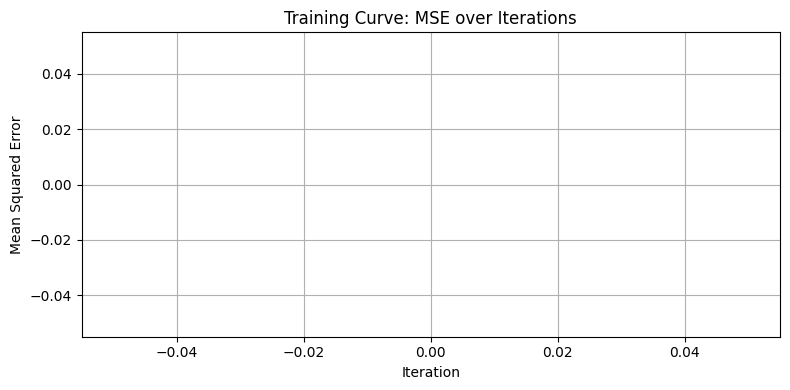

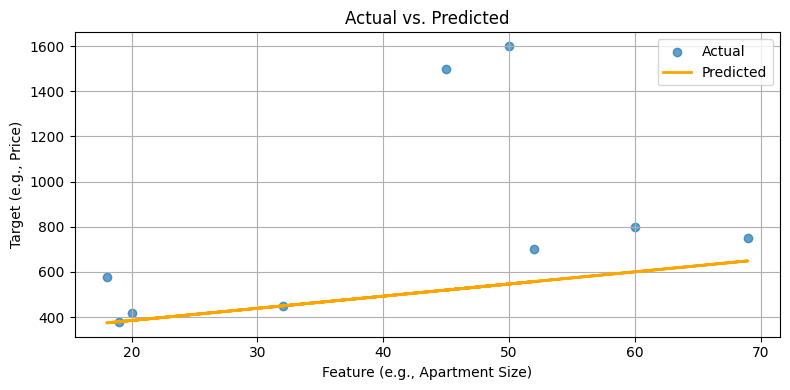

In [10]:
model = SimpleGradientDescentModel(learning_rate=0.01, n_iterations=1000)
model.fit(X[:,1], Y[:,0])

# Retrieve the MSE history
mse_history = model.get_mse_history()
predictions = model.predict(X[:,1])



plt.figure(figsize=(8, 4))
plt.plot(range(1, len(mse_history) + 1), mse_history, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training Curve: MSE over Iterations')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 1], Y[:, 0], label='Actual', alpha=0.7)
plt.plot(X[:, 1], predictions, color='orange', linewidth=2, label='Predicted')
plt.xlabel('Feature (e.g., Apartment Size)')
plt.ylabel('Target (e.g., Price)')
plt.title('Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Second sub-task: Gradient descent**

You should now use the real gradient -- we are interested in how the error (in our case the MSE) is changing depending on the current weights. Therefore, we can use the gradient of the error with respect to a weight and this gives us a direction in which the error would increase.

Tasks:

* Start with (small) initial values;
* Compute error for current parameters;
* Calculate gradients: Compute the partial derivatives (gradients) of the MSE with respect to $m$ (slope) and $b$ (intercept).
* Update parameters: Adjust the values of $m$ and $b$ using the gradients. The amount by which you adjust the parameters is controlled by a learning rate (start with a small value, e.g., $\alpha = 0.0001$ and run for a couple of thousand iterations).
* Repeat: Continue adjusting the parameters iteratively until the error converges to a minimum.

This approach is simpler than gradient descent but still allows you to iteratively find a better solution by trying out small adjustments to the parameters. You can fine-tune the step size and the number of iterations to balance between speed and accuracy.

*Formulae for Gradient Descent*

For linear regression, the MSE is defined as:

$$
\text{MSE}(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2
$$

Where

* $y_{\text{pred}, i} = m \cdot x_i + b$

*The partial derivatives of the cost function (MSE) are:*

* Gradient with respect to $m$ (slope): $\frac{\partial}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i}) \cdot x_i$

* Gradient with respect to $b$ (intercept): $\frac{\partial}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})$

*Gradient Descent Updates:*

The update rules for the slope $m$ and intercept $b$ are:


* $m = m - \alpha \cdot \frac{\partial}{\partial m} \text{MSE}(m, b)$

* $b = b - \alpha \cdot \frac{\partial}{\partial b} \text{MSE}(m, b)$


In [12]:
class GradientDescentModel:
    """
    A simple linear regression model that performs batch gradient descent.
    Supports both univariate (via fit) and multivariate (via fit_vector) gradient descent.
    """
    def __init__(self, learning_rate=0.0001, n_iterations=2000):
        # Univariate parameters
        self.slope = 0.0
        self.intercept = 0.0
        # Multivariate weight vector (including bias if provided)
        self.weights = None

        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.mse_history = []

    def set_params(self, m, b):
        """Set slope (m) and intercept (b) directly for univariate model."""
        self.slope = m
        self.intercept = b

    def fit(self, X, y):
        """
        Batch gradient descent for univariate linear regression.

        Parameters:
        X : array-like, shape (n_samples,)
        y : array-like, shape (n_samples,)

        Returns:
        self
        """
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)
        n = len(X)

        # initialize
        self.slope = 0.0
        self.intercept = 0.0
        self.mse_history = []

        for it in range(self.n_iterations):
            y_pred = self.slope * X + self.intercept
            errors = y - y_pred
            dm = -2/n * np.dot(X, errors)
            db = -2/n * np.sum(errors)
            self.slope -= self.learning_rate * dm
            self.intercept -= self.learning_rate * db
            self.mse_history.append(np.mean(errors**2))
        return self

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        return (self.slope * X + self.intercept).tolist()

    def fit_vector(self, X, y):

        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)
        n_samples, n_features = X.shape

        # initialize weight vector
        self.weights = np.zeros(n_features)
        self.mse_history = []

        for it in range(self.n_iterations):
            y_pred = X.dot(self.weights)
            errors = y_pred - y
            gradient = (2/n_samples) * X.T.dot(errors)
            self.weights -= self.learning_rate * gradient
            self.mse_history.append(np.mean(errors**2))
        return self

    def predict_vector(self, X):

        if self.weights is None:
            raise ValueError("Model has not been fitted with fit_vector yet.")
        X = np.asarray(X, dtype=float)
        return X.dot(self.weights)

    def get_mse_history(self):
        return self.mse_history




Use your code for visualization from above. Important: for gradient descent the learning rate is usually a quite sensitive parameter.

* Start initially with a very small value `(learning_rate=0.000005, n_iterations=100)`. What is the disadavantage of a small learning rate?
* Try slightly increasing the learning rate -- when is this breaking down and what do you observe when getting close to that learning rate?

#### Numpy Array Approach (TODO B)

In the code above there is a second fit method -- `fit_vector`. You should implement this now: the task is to remove the for iteration over the training and make this more efficient. But in addition, we are not updating the weights after every single example and change them. Instead, we calculate in a way over the training data set for each example a suggestion in which direction and how much the gradients should be moved and only in the end find a consensus.

Consider, how computing whole batches for a gradient update improves training:

* again, test different learning rates
* observe how training progresses and compare to using updates after each single sample.

Further analysis:

* Try for a good learning rate (fast learning and stable), try different initial values for the weights. What changes?
* Can you find initial values that break again learning?
* How do you explain this? Why is the system "sometimes" diverging?

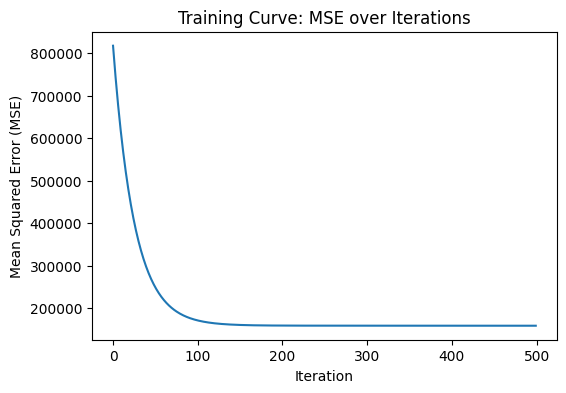

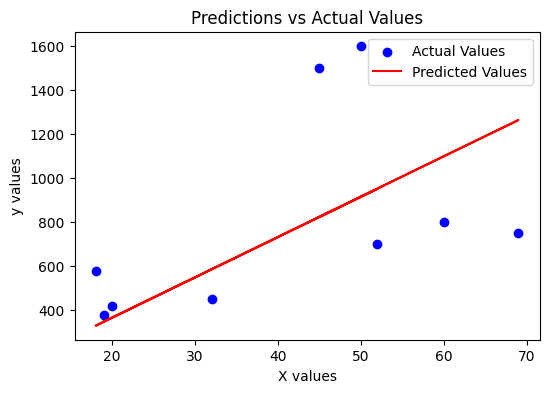

In [13]:

# 1) Instantiate with a tiny learning rate and desired iterations
model = GradientDescentModel(learning_rate=0.000005, n_iterations=500)

model.fit_vector(X, Y[:, 0])

# 3) Grab the learning curve and predictions
mse_history = model.get_mse_history()
predictions   = model.predict_vector(X)

# 4) Plot MSE over iterations
plt.figure(figsize=(6,4))
plt.plot(mse_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Curve: MSE over Iterations')
plt.show()

# 5) Plot Actual vs. Predicted
plt.figure(figsize=(6,4))
plt.scatter(X[:,1], Y[:,0], color='blue', label='Actual Values')
plt.plot(X[:,1], predictions,   color='red',  label='Predicted Values')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()


---

## 2.2 Multi-dimensional model

Adapt your class from above and use two input dimensions (X is a stacked input version -- check if this is still the case). A third dimension is the bias for which a constant of `1` was added to each entry (at index 0).

Now build a class GradientDescentModel_vector that deals with numpy array operations (only the outer iterations loop) is still used.

In [14]:
import numpy as np

class GradientDescentModel_vector:
    """
    A linear regression model with batch gradient descent for multiple input dimensions.
    The input X is expected to have a bias column (1s) as the first column.
    """

    def __init__(self, learning_rate=0.0001, n_iterations=1000, verbose=False):
        self.learning_rate = learning_rate  # step size α
        self.n_iterations = n_iterations    # number of epochs
        self.verbose = verbose              # whether to print progress
        self.weights = None                 # weight vector (including bias)
        self.mse_history = []               # MSE per iteration

    def fit(self, X, y):
        """
        Fit the model using batch gradient descent.

        Parameters:
        X : array-like, shape (n_samples, n_features)
            Features, with bias column as first feature.
        y : array-like, shape (n_samples,)
            Targets.
        """
        X = np.asarray(X, float)
        y = np.asarray(y, float)
        n_samples, n_features = X.shape

        # Initialize weights (one per feature, including bias)
        self.weights = np.zeros(n_features)
        self.mse_history = []

        for i in range(self.n_iterations):
            # 1) Predictions: y_pred = X · w
            y_pred = X.dot(self.weights)

            # 2) Error vector: e = y_pred – y
            errors = y_pred - y

            # 3) Gradient: ∇ = (2/n) · Xᵀ · e
            gradient = (2.0 / n_samples) * X.T.dot(errors)

            # 4) Update: w ← w – α ∇
            self.weights -= self.learning_rate * gradient

            # 5) Record MSE: (1/n) ∑ e²
            mse = np.mean(errors**2)
            self.mse_history.append(mse)

            if self.verbose and i % 100 == 0:
                print(f"Iteration {i:4d}: MSE = {mse:.6f}")

        return self

    def predict(self, X):
        """
        Make predictions using the trained model.

        Parameters:
        X : array-like, shape (n_samples, n_features)
            New data with bias column.

        Returns:
        numpy array, shape (n_samples,)
            Predicted values.
        """
        if self.weights is None:
            raise ValueError("Model not yet fitted — call `fit` first.")
        X = np.asarray(X, float)
        return X.dot(self.weights)

    def get_mse_history(self):
        """
        Retrieve the MSE recorded after each iteration.
        """
        return self.mse_history


Again, use your code for visualization from above. As we are now considering multiple input dimension, this doesn't lead to a single straight line anymore, but we are seeing projections onto individual planes.

* For a line representation, order the sequence of inputs along the specific input dimension (is already done for first dimension below)
* Extend it towards a second input dimension.

Consider, how computing whole batches for a gradient update improves training:

* Compare the predictions with the simpler model.
* Learn for a longer time -- and test again different learning rates.

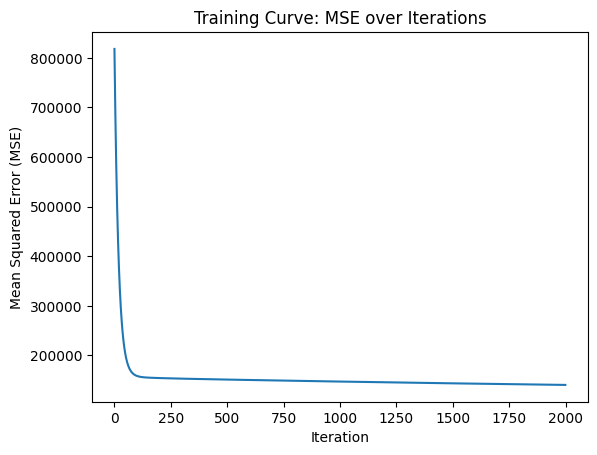

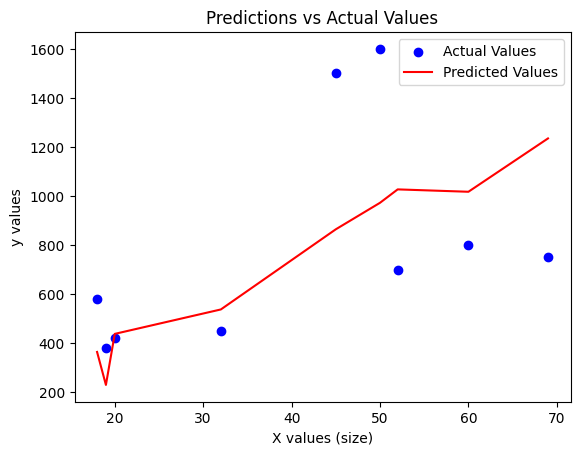

In [15]:
# Create and train the model
model = GradientDescentModel_vector(learning_rate=0.0005, n_iterations=2000)
model.fit(X, Y[:, 0])  # Fit the model

# Retrieve the MSE history and predictions
mse_history = model.get_mse_history()
predictions = model.predict(X)

# Sort the X values and corresponding predictions for smooth line plotting
sorted_indices = np.argsort(X[:, 1])
sorted_X = X[sorted_indices, 1]
sorted_predictions = predictions[sorted_indices]
# TODO: Adapt this for the second input dimension (distance to center)

# Plot the training curve (MSE over iterations)
plt.plot(mse_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Curve: MSE over Iterations')
plt.show()

# Plot predictions vs actual values
plt.scatter(X[:, 1], Y[:, 0], color='blue', label='Actual Values')  # X[:, 1] is the first feature (without bias)
plt.plot(sorted_X, sorted_predictions, color='red', label='Predicted Values')
plt.xlabel('X values (size)')
plt.ylabel('y values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()

# TODO: Plot predictions vs actual values

### 3D Visualization of fitted linear model

Below is an example how to visualize a 3D plane in matplotlib.

* Adapt it to visualize the plane spanned by the model,
* plot the real data points and
* include dotted lines indicating the error for the data.

For more information on parameters for 3D plotting see the [documentation of matplotlib](https://matplotlib.org/stable/gallery/mplot3d/index.html).

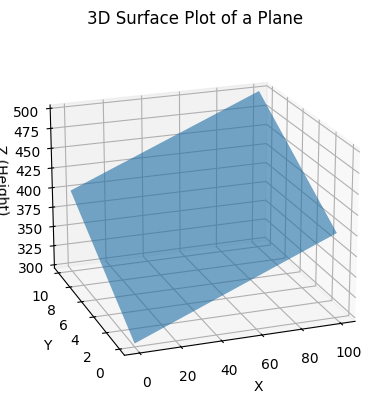

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Define the corner points for X and Y
# This gives 4 points = 2 x 2 permutations of the two different arrays.
# TODO: You have to adapt this for showing the model plane.
# Consider:
# - How many points do you need to span the linear plane?
# - which should you use?
x_plane = np.array([0, 100])
y_plane = np.array([0, 10])

# Create a mesh grid from the corner points
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)

# Define the corresponding Z (height) values for each corner
# TODO: And here you have to use projected values
Z_plane = np.array([[300, 400], [400, 500]])

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot, with color shading based on Z
surf = ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.6)
ax.view_init(elev=20, azim=-110)


# TODO: plot lines from prediction (on the surface) to real value
# ax.plot([], color='green', linewidth=2)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z (Height)')

# Set a title
ax.set_title('3D Surface Plot of a Plane')

# Show the plot
plt.show()


---

# 2.3 Finding the Optimal Values Analytically for Simple Linear Regression

In this task, you are required to compute the optimal slope $(m)$ and intercept $(b)$ analytically for a simple linear regression problem (we are starting with the simple one dimensional input case again). Instead of using iterative methods like gradient descent or brute-force optimization, you will directly calculate the values of
$m$ and $b$ that minimize the Mean Squared Error (MSE) using closed-form solutions.

**Overview:**

For simple linear regression, the relationship between the independent variable $(x)$ (e.g., apartment size) and the dependent variable $(y)$ (e.g., price) is modeled as:
$$
y = m \cdot x + b
$$

Where:
- $m$ is the slope (or coefficient) that determines how much $y$ changes as $x$ changes.
- $b$ is the intercept, which is the value of $y$ when $x = 0$.

The goal is to find the values of $m$ and $b$ that minimize the *Mean Squared Error (MSE)*. This can be done analytically using the following closed-form equations.

Try to find the analytical solution -- i.e. for a given function you are searching for local optima (characterized by gradients that equal zero).

**Analytical Solutions for $m$ and $b$:**

The optimal slope \(m\) and intercept \(b\) for linear regression can be found using the *least squares method*:

1. *Optimal Slope ($m$)*:
$$
   m = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - \left( \sum x_i \right)^2}
$$

Where:

* $n$ is the number of data points.
* $\sum x_i y_i$ is the sum of the products of $x_i$ and $y_i$.
* $\sum x_i$ is the sum of the $x$-values.
* $\sum y_i$ is the sum of the $y$-values.
* $\sum x_i^2$ is the sum of the squared $x$-values.

2. *Optimal Intercept ($b$)*:
$$
   b = \frac{\sum y_i - m \sum x_i}{n}
$$

Where $m$ is the slope computed from the formula above.

**Task Instructions:**

1. Compute the sums required for the formulae above.
2. Use the formulae provided above to compute the optimal slope $m$ and intercept $b$.
3. Once you have the analytical solutions for $m$ and $b$, use them to predict $y$-values for any given $x$-values (e.g., apartment sizes) and compare the predictions with the actual prices.
4. Calculate the Mean Squared Error (MSE) for these predictions to verify that the analytically computed values for $m$ and $b$ minimize the error.

In [22]:
import numpy as np

class OptimalLinearModel:
    """
    A simple linear regression model that directly calculates the optimal slope and intercept
    using the closed-form least-squares solution for simple linear regression.
    """

    def __init__(self):
        self.slope = None      # m
        self.intercept = None  # b

    def fit(self, X, y):

        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)
        n = X.size

        sum_x  = X.sum()
        sum_y  = y.sum()
        sum_xy = (X * y).sum()
        sum_x2 = (X * X).sum()

        # closed-form slope (m)
        m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)

        # closed-form intercept (b)
        b = (sum_y - m * sum_x) / n

        self.slope = m
        self.intercept = b
        return self

    def predict(self, X):

        X = np.asarray(X, dtype=float)
        return self.slope * X + self.intercept

    def mse(self, X, y):

        y = np.asarray(y, dtype=float)
        y_pred = self.predict(X)
        return np.mean((y - y_pred)**2)


And we finally calculate the optimal values -- and visualize this optimal linear model (optimal in the sense that it minimizes MSE).

Remarks on optimal solution:

* No Iterative Updates: The weights are computed directly using the normal equation, which gives the optimal solution in one step.
* Efficient for Small Data: This approach works well for small datasets.
* But: computing the inverse of large matrices can be computationally expensive for large datasets.
* Accurate: The normal equation provides the exact solution, so there is no need for tuning parameters like the learning rate or number of iterations.


MSE:  139993.78799116772


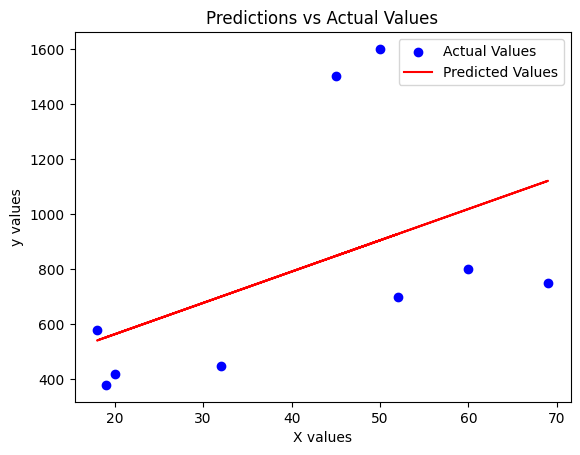

In [23]:
# Fit the optimal model
model = OptimalLinearModel()
model.fit(X[:,1], Y[:,0])

# Retrieve the MSE history
predictions = model.predict(X[:,1])
print("MSE: ", model.mse(X[:,1], Y[:,0]))

# Assume you have predicted values and actual values
plt.scatter(X[:,1], Y[:,0], color='blue', label='Actual Values')
plt.plot(X[:,1], predictions, color='red', label='Predicted Values')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()


### Optimal Solution for multidimensional case

In this version of the linear regression model, we are using the **Normal Equation** to directly compute the optimal weights for a multivariate linear regression problem. The **Normal Equation** provides a closed-form solution for the parameters (weights), avoiding the need for iterative optimization methods like gradient descent.

### Task List:
- **Input Representation**: The input matrix $\mathbf{X}$ is expected to have a bias column of ones as the first column, with subsequent columns representing the features.
- **Weights Calculation**: The optimal weights $\mathbf{w}$ are calculated using the following formula:
  $$
  \mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
  $$
- **Prediction**: Once the weights are calculated, the prediction for any new data $\mathbf{X}_{\text{new}}$ is done using matrix-vector multiplication:
  $$
  \hat{\mathbf{y}} = \mathbf{X}_{\text{new}} \mathbf{w}
  $$


In [25]:
import numpy as np

class OptimalLinearModel_vector:
    """
    A linear regression model that directly calculates the optimal weights
    using the normal equation (closed-form solution) for multiple input dimensions.
    The input X is expected to have a bias column (1s) as the first column.
    """

    def __init__(self):
        self.weights = None  # Weights vector (including bias weight)

    def fit(self, X, y):

        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)
        # Compute (X^T X)
        xtx = X.T @ X
        # Invert
        xtx_inv = np.linalg.inv(xtx)
        # Compute X^T y
        xty = X.T @ y
        # Optimal weights: (X^T X)^{-1} X^T y
        self.weights = xtx_inv @ xty
        return self

    def predict(self, X):

        if self.weights is None:
            raise ValueError("Model has not been fitted yet. Call `fit` first.")
        return np.asarray(X, dtype=float) @ self.weights

    def mse(self, X, y):

        y_pred = self.predict(X)
        return np.mean((y_pred - np.asarray(y, dtype=float))**2)


Again, we use code from above for visualization.

MSE multidimensional model:  112208.81932007565


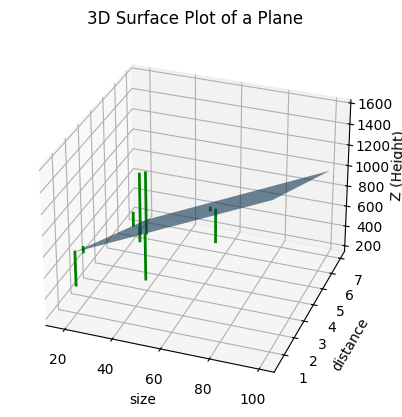

In [26]:
# Create and train the model
model = OptimalLinearModel_vector()
model.fit(X, Y[:, 0])  # Fit the model

predictions = model.predict(X)

print("MSE multidimensional model: ", model.mse(X, Y[:, 0]))

from mpl_toolkits.mplot3d import Axes3D

# Define the corner points for X and Y
# This gives 4 points = 2 x 2 permutations of the two different arrays.
# Consider:
# - How many points do you need to span the linear plane?
# - which should you use?
x_plane = np.array([20, 100])
y_plane = np.array([1, 7])

# Create a mesh grid from the corner points
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)

# Define the corresponding Z (height) values for each corner
corners = np.array([[1,x_plane[0],y_plane[0]],[1,x_plane[1],y_plane[0]],[1,x_plane[0],y_plane[1]],[1,x_plane[1],y_plane[1]]])
predictions_plane = model.predict(corners)
Z_plane = np.array([[predictions_plane[0], predictions_plane[1]], [predictions_plane[2], predictions_plane[3]]])

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot, with color shading based on Z
surf = ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.6)
ax.view_init(elev=30, azim=-70)

for i in range(len(predictions)):
    ax.plot([X[i,1], X[i,1]], [X[i,2], X[i,2]], [Y[i,0], predictions[i]],
        color='green', linewidth=2)


# Set labels
ax.set_xlabel('size')
ax.set_ylabel('distance')
ax.set_zlabel('Z (Height)')

# Set a title
ax.set_title('3D Surface Plot of a Plane')

# Show the plot
plt.show()


## Final Remarks / Check for your Understanding

Briefly check your understanding of:

* the learning curve
* the learning rate
    * How to find an optimal one? And what does optimal mean?
    * What can happen with a learning rate that is too high or too low?
    * To avoid long learning times -- what could you improve in the approach?
* the choice of initial values

Further questions:

* Do you have an idea and can explain why gradient descent sometimes diverges and goes off rails?
* What is a disadvantage of the analytical optimization approach?
* How would you handle multiple output values (there is one further output given)?
* Which is the best approach? And in what sense?
* What are we actually measuring -- and what would we have to do to measure generalization?

<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 15.10.2024; Explanations were initially generated and afterwards edited;</i>
</div>